In [1]:
import pandas as pd
import numpy as np

In [2]:
%store -r m2_df

In [3]:
m2_df

,Date,M2
0,1980-11-03,1591.4
1,1980-11-10,1592.9
2,1980-11-17,1596.3
3,1980-11-24,1597.2
4,1980-12-01,1596.1
...,...,...
2096,2021-01-04,19081.0
2097,2021-01-11,19453.9
2098,2021-01-18,19470.0
2099,2021-01-25,19419.6


In [4]:
m2_1wk_df = m2_df

In [5]:
m2_1wk_df

,Date,M2
0,1980-11-03,1591.4
1,1980-11-10,1592.9
2,1980-11-17,1596.3
3,1980-11-24,1597.2
4,1980-12-01,1596.1
...,...,...
2096,2021-01-04,19081.0
2097,2021-01-11,19453.9
2098,2021-01-18,19470.0
2099,2021-01-25,19419.6


In [7]:
# Creating column to calculate weekly % change in M2
m2_1wk_df['1wk Change'] = m2_1wk_df['M2'].pct_change()

In [133]:
# Sorting df by weekly change in M2 to understand effect of stimulus checks on M2
m2_1wk_df.sort_values(by = '1wk Change', ascending = False)

,Date,M2,1wk Change,BTC/USD,Oz Gold/USD,SP500,BTC 1wk Change,Gold 1wk Change,SP 500 1wk Change,M2 Change Cat,M2 Change Cat 2
1089,2001-09-17,5448.0,0.032327,NaN,293.3,NaN,NaN,0.080295,NaN,High,High
2055,2020-03-23,16163.5,0.027004,6416.314758,1525.4,2237.40,0.279557,0.025341,-0.062331,High,High
2056,2020-03-30,16545.3,0.023621,6429.841934,1618.3,2626.65,0.002108,0.060902,0.173974,High,High
2059,2020-04-20,17089.5,0.021568,6881.958693,1686.2,2823.16,0.005394,0.003272,0.022280,High,High
1455,2008-09-22,7942.2,0.020665,NaN,889.0,NaN,NaN,0.147097,NaN,High,High
...,...,...,...,...,...,...,...,...,...,...,...
1261,2005-01-03,6387.9,-0.006887,NaN,435.6,NaN,NaN,-0.012469,NaN,Low,Low
1190,2003-08-25,6083.8,-0.007747,NaN,358.8,NaN,NaN,-0.004163,NaN,Low,Low
172,1984-02-20,2137.7,-0.012382,NaN,385.3,NaN,NaN,0.022287,NaN,Low,Low
1090,2001-09-24,5366.3,-0.014996,NaN,288.2,NaN,NaN,-0.017388,NaN,Low,Low


<AxesSubplot:xlabel='Date'>

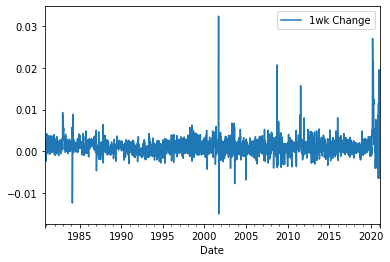

In [8]:
# Plotting line graph of M2 Weekly Change
m2_1wk_df.plot(x = 'Date', y = '1wk Change')

<AxesSubplot:xlabel='Date', ylabel='M2 Money Supply'>

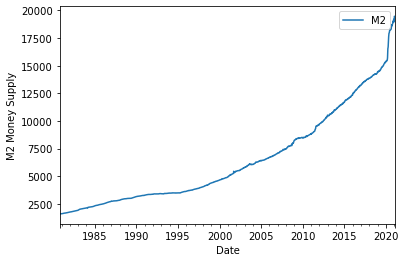

In [126]:
# Plotting line graph of M2
m2_1wk_df.plot(x = 'Date', y = 'M2', ylabel = 'M2 Money Supply')

In [10]:
%store -r btc_df
%store -r gold_usd_df

In [11]:
# Merging in BTC data
m2_1wk_df = pd.merge(m2_1wk_df, btc_df, how = 'left', on = 'Date')

In [12]:
# Merging in gold data
m2_1wk_df = pd.merge(m2_1wk_df, gold_usd_df, how = 'left', on = 'Date')

In [13]:
%store -r sp500_df

In [14]:
# Merging in S&P 500 data
m2_1wk_df = pd.merge(m2_1wk_df, sp500_df, how = 'left', on = 'Date')

In [15]:
# Creating column to calculate weekly % change in BTC
m2_1wk_df['BTC 1wk Change'] = m2_1wk_df['BTC/USD'].pct_change()

In [16]:
# Creating column to calculate weekly % change in gold
m2_1wk_df['Gold 1wk Change'] = m2_1wk_df['Oz Gold/USD'].pct_change()

In [17]:
# Creating column to calculate weekly % change in S&P 500
m2_1wk_df['SP 500 1wk Change'] = m2_1wk_df['SP500'].pct_change()

array([[<AxesSubplot:title={'center':'1wk Change'}>]], dtype=object)

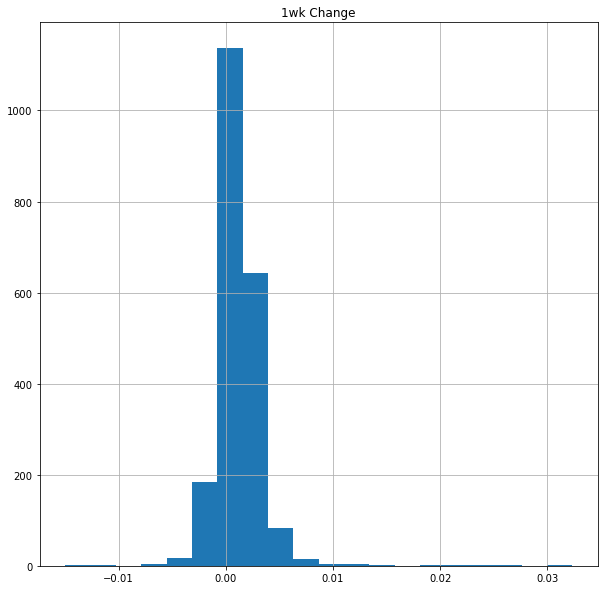

In [61]:
# Creating histogram of M2 weekly change
m2_1wk_df.hist(column = '1wk Change', figsize = (10,10), bins = 20)

In [26]:
# Finding standard dev of M2 weekly change
m2_1wk_std = m2_1wk_df['1wk Change'].std()

In [27]:
# Finding mean of M2 weekly change
m2_1wk_mean = m2_1wk_df['1wk Change'].mean()

In [33]:
def m2cat(m2_change):
     """
    This function categorizes weekly M2 changes.
    A 'High' weekly change is any change 2 standard deviations above the mean.
    A 'Low' weekly change is any change 2 standard deviations below the mean.
    Anything else is 'Normal'
    
    Inputs:
    Weekly M2 change
    
    Outputs:
    Categorical variables to describe weekly change in M2 ('High', 'Normal', and 'Low')
    """
    if m2_change > m2_1wk_mean + m2_1wk_std*2:
        return 'High'
    elif m2_change < m2_1wk_mean - m2_1wk_std*2:
        return 'Low'
    else:
        return 'Normal'

In [34]:
# Creating categorical columns to describe weekly M2 change
m2_1wk_df['M2 Change Cat'] = m2_1wk_df['1wk Change'].apply(m2cat)

In [131]:
# Finding count of each categorical column for weekly M2 change
m2_1wk_df.groupby('M2 Change Cat').count().drop(columns = ['M2','BTC/USD','Oz Gold/USD', 'SP500'])

,Date,1wk Change,BTC 1wk Change,Gold 1wk Change,SP 500 1wk Change,M2 Change Cat 2
M2 Change Cat,,,,,,
High,36,36,15,36,17,36
Low,23,23,7,23,7,23
Normal,2042,2041,383,2041,473,2042


<AxesSubplot:title={'center':'Gold 1wk Change'}, xlabel='M2 Change Cat'>

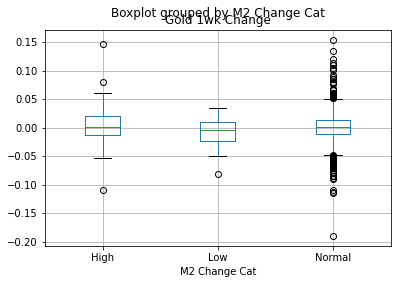

In [37]:
# Creating boxplot of weekly change in gold based on M2 Change Cat column
m2_1wk_df.boxplot(column = 'Gold 1wk Change', by = 'M2 Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

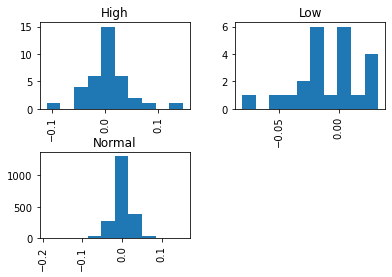

In [65]:
# Creating histograms of weekly change in gold based on M2 Change Cat column
m2_1wk_df.hist(column = 'Gold 1wk Change', by = 'M2 Change Cat')

In [43]:
from scipy.stats import ttest_ind

In [68]:
from scipy.stats import mannwhitneyu

In [48]:
# Creating series for different sets of weekly change in gold price based on M2 Change Cat
high_m2_1wk_gold_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'High']['Gold 1wk Change'].dropna()
normal_m2_1wk_gold_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Normal']['Gold 1wk Change'].dropna()
low_m2_1wk_gold_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Low']['Gold 1wk Change'].dropna()

In [69]:
# Man Whit U hypothesis test for gold weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_gold_change, normal_m2_1wk_gold_change)

MannwhitneyuResult(statistic=34425.0, pvalue=0.2583947868183374)

In [70]:
# Man Whit U hypothesis test for gold weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_gold_change, low_m2_1wk_gold_change)

MannwhitneyuResult(statistic=331.5, pvalue=0.10114126462696998)

In [71]:
# Man Whit U hypothesis test for gold weekly change with normal and low M2 change datasets
mannwhitneyu(normal_m2_1wk_gold_change, low_m2_1wk_gold_change)

MannwhitneyuResult(statistic=19307.0, pvalue=0.07145177441057432)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

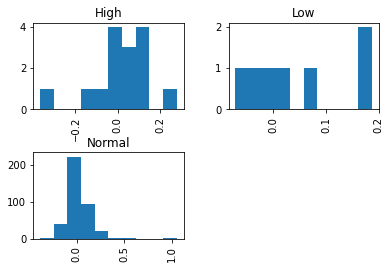

In [67]:
# Creating histograms of weekly change in BTC based on M2 Change Cat column
m2_1wk_df.hist(column = 'BTC 1wk Change', by = 'M2 Change Cat')

<AxesSubplot:title={'center':'BTC 1wk Change'}, xlabel='M2 Change Cat'>

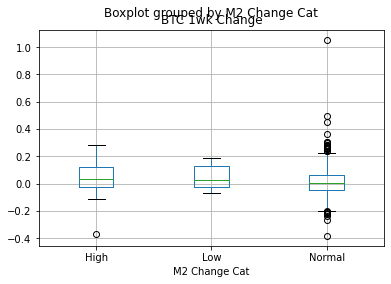

In [38]:
# Creating boxplot of weekly change in BTC based on M2 Change Cat column
m2_1wk_df.boxplot(column = 'BTC 1wk Change', by = 'M2 Change Cat')

In [52]:
# Creating series for different sets of weekly change in BTC price based on M2 Change Cat
high_m2_1wk_BTC_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'High']['BTC 1wk Change'].dropna()
normal_m2_1wk_BTC_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Normal']['BTC 1wk Change'].dropna()
low_m2_1wk_BTC_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Low']['BTC 1wk Change'].dropna()

In [72]:
# Man Whit U hypothesis test for BTC weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_BTC_change, normal_m2_1wk_BTC_change)

MannwhitneyuResult(statistic=2552.0, pvalue=0.232033843228248)

In [73]:
# Man Whit U hypothesis test for BTC weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_BTC_change, low_m2_1wk_BTC_change)

MannwhitneyuResult(statistic=50.0, pvalue=0.44394228834015875)

In [74]:
# Man Whit U hypothesis test for BTC weekly change with normal and low M2 change datasets
mannwhitneyu(normal_m2_1wk_BTC_change, low_m2_1wk_BTC_change)

MannwhitneyuResult(statistic=1144.0, pvalue=0.2536181572532983)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

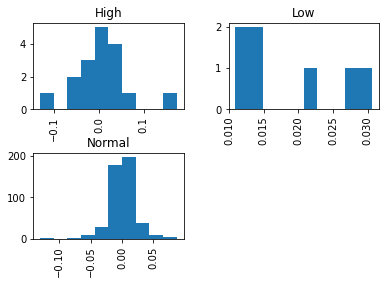

In [66]:
# Creating histograms of weekly change in S&P 500 based on M2 Change Cat column
m2_1wk_df.hist(column = 'SP 500 1wk Change', by = 'M2 Change Cat')

<AxesSubplot:title={'center':'SP 500 1wk Change'}, xlabel='M2 Change Cat'>

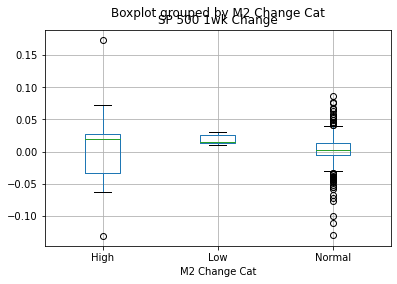

In [39]:
# Creating boxplot of weekly change in S&P 500 based on M2 Change Cat column
m2_1wk_df.boxplot(column = 'SP 500 1wk Change', by = 'M2 Change Cat')

In [56]:
# Creating series for different sets of weekly change in S&P 500 price based on M2 Change Cat
high_m2_1wk_SP_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'High']['SP 500 1wk Change'].dropna()
normal_m2_1wk_SP_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Normal']['SP 500 1wk Change'].dropna()
low_m2_1wk_SP_change = m2_1wk_df[m2_1wk_df['M2 Change Cat'] == 'Low']['SP 500 1wk Change'].dropna()

In [75]:
# Man Whit U hypothesis test for S&P 500 weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_SP_change, normal_m2_1wk_SP_change)

MannwhitneyuResult(statistic=3587.0, pvalue=0.22505803271651115)

In [76]:
# Man Whit U hypothesis test for S&P 500 weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_SP_change, low_m2_1wk_SP_change)

MannwhitneyuResult(statistic=50.0, pvalue=0.28375553148860444)

In [77]:
# Man Whit U hypothesis test for S&P 500 weekly change with low and normal M2 change datasets
mannwhitneyu(normal_m2_1wk_SP_change, low_m2_1wk_SP_change)

MannwhitneyuResult(statistic=586.0, pvalue=0.0016645806250648865)

In [87]:
# Creating dictionary with various p-values from above analysis of Gold, BTC and S&P 500 weekly changes
mw_u_m2 = {'Gold pvalues':[0.25839,0.10114,0.026012], 'BTC pvalues':[0.23203, 0.44394,0.25362], \
                 'SP500 pvalues':[0.22506, 0.28376, 0.0166]}

In [84]:
mw_u_m2_df = pd.DataFrame.from_dict(mw_u_m2, orient='index', columns = ['High/Normal', 'High/Low', 'Normal/Low'])

In [88]:
mw_u_m2_df

,High/Normal,High/Low,Normal/Low
Gold pvalues,0.25839,0.10114,0.026012
BTC pvalues,0.23203,0.44394,0.253620
SP500 pvalues,0.22506,0.28376,0.011660


<AxesSubplot:title={'center':'P-Values for Gold, and S&P 500 Weekly Changes for various M2 Change Cats'}>

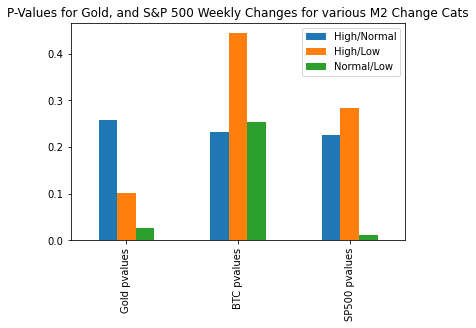

In [135]:
# Creating bar chart for various p-values from above analysis of Gold, BTC and S&P 500 weekly changes
mw_u_m2_df.plot.bar(title = 'P-Values for Gold, and S&P 500 Weekly Changes for various M2 Change Cats')

In [92]:
# Finding mean of columns grouping by M2 Change Cat column
m2_1wk_df.groupby('M2 Change Cat').agg('mean').drop(columns = ['M2','BTC/USD','Oz Gold/USD', 'SP500'])

,1wk Change,BTC 1wk Change,Gold 1wk Change,SP 500 1wk Change
M2 Change Cat,,,,
High,0.011034,0.022237,0.005211,0.005933
Low,-0.005361,0.049301,-0.008241,0.018799
Normal,0.001095,0.019549,0.000842,0.002021


In [93]:
def m2cat_2(m2_change):
    """
    This function categorizes weekly M2 changes.
    A 'High' weekly change is any change 1 standard deviations above the mean.
    A 'Low' weekly change is any change 1 standard deviations below the mean.
    Anything else is 'Normal'
    
    Inputs:
    Weekly M2 change
    
    Outputs:
    Categorical variables to describe weekly change in M2 ('High', 'Normal', and 'Low')
    """
    if m2_change > m2_1wk_mean + m2_1wk_std:
        return 'High'
    elif m2_change < m2_1wk_mean - m2_1wk_std:
        return 'Low'
    else:
        return 'Normal'

In [94]:
# Creating categorical columns to describe weekly M2 change (this time 1 std from mean instead of 2)
m2_1wk_df['M2 Change Cat 2'] = m2_1wk_df['1wk Change'].apply(m2cat_2)

In [132]:
# Finding count of each categorical column for weekly M2 change (this time 1 std from mean instead of 2)
m2_1wk_df.groupby('M2 Change Cat 2').count().drop(columns = ['M2','BTC/USD','Oz Gold/USD', 'SP500'])

,Date,1wk Change,BTC 1wk Change,Gold 1wk Change,SP 500 1wk Change,M2 Change Cat
M2 Change Cat 2,,,,,,
High,167,167,40,167,51,167
Low,155,155,31,155,40,155
Normal,1779,1778,334,1778,406,1779


<AxesSubplot:title={'center':'Gold 1wk Change'}, xlabel='M2 Change Cat 2'>

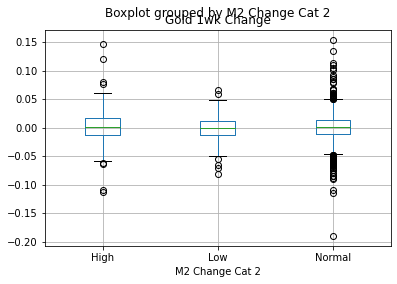

In [96]:
# Creating boxplot of weekly change in gold based on M2 Change Cat 2 column
m2_1wk_df.boxplot(column = 'Gold 1wk Change', by = 'M2 Change Cat 2')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

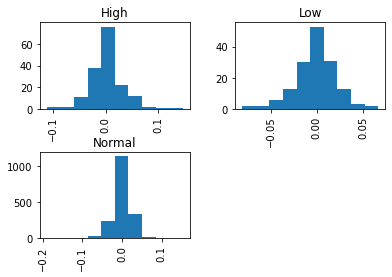

In [97]:
# Creating histogram of weekly change in gold based on M2 Change Cat 2 column
m2_1wk_df.hist(column = 'Gold 1wk Change', by = 'M2 Change Cat 2')

In [43]:
from scipy.stats import ttest_ind

In [68]:
from scipy.stats import mannwhitneyu

In [98]:
# Creating series for different sets of weekly change in gold price based on M2 Change Cat 2
high_m2_1wk_gold_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'High']['Gold 1wk Change'].dropna()
normal_m2_1wk_gold_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Normal']['Gold 1wk Change'].dropna()
low_m2_1wk_gold_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Low']['Gold 1wk Change'].dropna()

In [101]:
# Man Whit U hypothesis test for gold weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_gold_change_2, normal_m2_1wk_gold_change_2)

MannwhitneyuResult(statistic=146395.0, pvalue=0.3828712387217875)

In [102]:
# Man Whit U hypothesis test for gold weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_gold_change_2, low_m2_1wk_gold_change_2)

MannwhitneyuResult(statistic=12016.0, pvalue=0.1336306552857781)

In [103]:
# Man Whit U hypothesis test for gold weekly change with low and normal M2 change datasets
mannwhitneyu(normal_m2_1wk_gold_change_2, low_m2_1wk_gold_change_2)

MannwhitneyuResult(statistic=129060.0, pvalue=0.09499694168032252)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

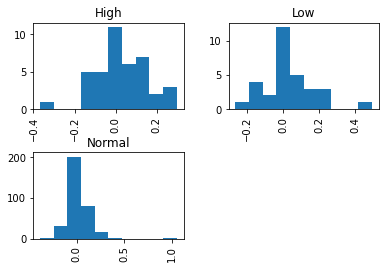

In [100]:
# Creating histograms of weekly change in BTC based on M2 Change Cat 2 column
m2_1wk_df.hist(column = 'BTC 1wk Change', by = 'M2 Change Cat 2')

<AxesSubplot:title={'center':'BTC 1wk Change'}, xlabel='M2 Change Cat 2'>

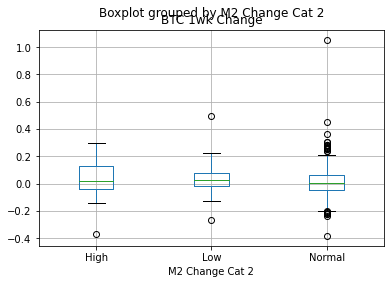

In [104]:
# Creating boxplots of weekly change in BTC based on M2 Change Cat 2 column
m2_1wk_df.boxplot(column = 'BTC 1wk Change', by = 'M2 Change Cat 2')

In [105]:
# Creating series for different sets of weekly change in BTC price based on M2 Change Cat 2
high_m2_1wk_BTC_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'High']['BTC 1wk Change'].dropna()
normal_m2_1wk_BTC_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Normal']['BTC 1wk Change'].dropna()
low_m2_1wk_BTC_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Low']['BTC 1wk Change'].dropna()

In [106]:
# Man Whit U hypothesis test for BTC weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_BTC_change_2, normal_m2_1wk_BTC_change_2)

MannwhitneyuResult(statistic=6033.0, pvalue=0.15852137479160855)

In [107]:
# Man Whit U hypothesis test for BTC weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_BTC_change_2, low_m2_1wk_BTC_change_2)

MannwhitneyuResult(statistic=613.0, pvalue=0.4699651084820097)

In [108]:
# Man Whit U hypothesis test for BTC weekly change with low and normal M2 change datasets
mannwhitneyu(normal_m2_1wk_BTC_change_2, low_m2_1wk_BTC_change_2)

MannwhitneyuResult(statistic=4581.0, pvalue=0.144643421035124)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

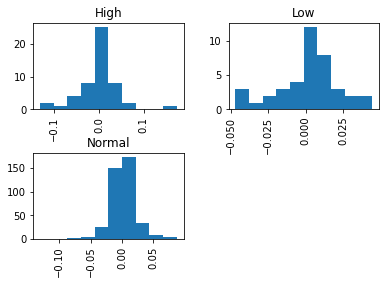

In [109]:
# Creating histograms of weekly change in S&P 500 based on M2 Change Cat 2 column
m2_1wk_df.hist(column = 'SP 500 1wk Change', by = 'M2 Change Cat 2')

<AxesSubplot:title={'center':'SP 500 1wk Change'}, xlabel='M2 Change Cat 2'>

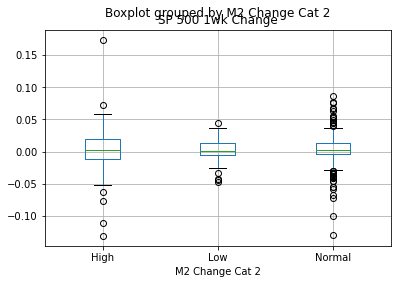

In [110]:
# Creating boxplot of weekly change in S&P 500 based on M2 Change Cat 2 column
m2_1wk_df.boxplot(column = 'SP 500 1wk Change', by = 'M2 Change Cat 2')

In [111]:
# Creating series for different sets of weekly change in S&P 500 price based on M2 Change Cat 2
high_m2_1wk_SP_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'High']['SP 500 1wk Change'].dropna()
normal_m2_1wk_SP_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Normal']['SP 500 1wk Change'].dropna()
low_m2_1wk_SP_change_2 = m2_1wk_df[m2_1wk_df['M2 Change Cat 2'] == 'Low']['SP 500 1wk Change'].dropna()

In [112]:
# Man Whit U hypothesis test for S&P 500 weekly change with high and normal M2 change datasets
mannwhitneyu(high_m2_1wk_SP_change_2, normal_m2_1wk_SP_change_2)

MannwhitneyuResult(statistic=9857.0, pvalue=0.28855371840866906)

In [113]:
# Man Whit U hypothesis test for S&P 500 weekly change with high and low M2 change datasets
mannwhitneyu(high_m2_1wk_SP_change_2, low_m2_1wk_SP_change_2)

MannwhitneyuResult(statistic=957.0, pvalue=0.3085630989810228)

In [114]:
# Man Whit U hypothesis test for S&P 500 weekly change with low and normal M2 change datasets
mannwhitneyu(normal_m2_1wk_SP_change_2, low_m2_1wk_SP_change_2)

MannwhitneyuResult(statistic=8027.0, pvalue=0.4526449269963294)

In [115]:
# Creating dictionary with various p-values from above analysis of Gold, BTC and S&P 500 weekly changes
mw_u_m2_2 = {'Gold pvalues':[0.38287, 0.13363, 0.09499], 'BTC pvalues':[0.15852, 0.46997, 0.14464], \
                 'SP500 pvalues':[0.28855, 0.30856, 0.45264]}

In [120]:
mw_u_m2_2_df = pd.DataFrame.from_dict(mw_u_m2_2, orient='index', columns = ['High/Normal', 'High/Low', 'Normal/Low'])

In [121]:
mw_u_m2_2_df

,High/Normal,High/Low,Normal/Low
Gold pvalues,0.38287,0.13363,0.09499
BTC pvalues,0.15852,0.46997,0.14464
SP500 pvalues,0.28855,0.30856,0.45264


<AxesSubplot:title={'center':'P-Values for Gold, and S&P 500 Weekly Changes for various M2 Change Cats'}>

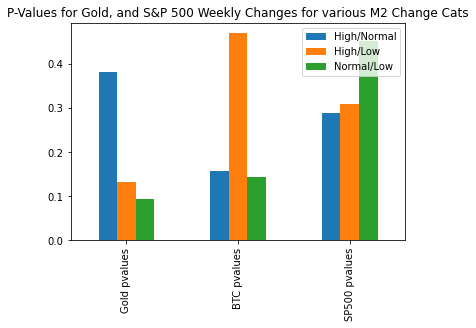

In [134]:
# Creating bar chart for various p-values from above analysis of Gold, BTC and S&P 500 weekly changes
mw_u_m2_2_df.plot.bar(title = 'P-Values for Gold, and S&P 500 Weekly Changes for various M2 Change Cats')

In [123]:
# Finding mean of columns grouping by CPI Change Cat 2 column
m2_1wk_df.groupby('M2 Change Cat 2').agg('mean').drop(columns = ['M2','BTC/USD','Oz Gold/USD', 'SP500'])

,1wk Change,BTC 1wk Change,Gold 1wk Change,SP 500 1wk Change
M2 Change Cat 2,,,,
High,0.005720,0.031293,0.002222,0.001652
Low,-0.002297,0.038541,-0.001634,0.001210
Normal,0.001074,0.017124,0.000899,0.002600
